In [9]:
from sklearn.datasets import load_iris

iris = load_iris()

In [10]:
# splitting into train and test datasets

from sklearn.model_selection import train_test_split
datasets = train_test_split(iris.data, iris.target,
                            test_size=0.2)

train_data, test_data, train_labels, test_labels = datasets

In [11]:
# scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# we fit the train data
scaler.fit(train_data)

# scaling the train data
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

print(train_data[:3])

[[-1.49823455  1.34382016 -1.57344232 -1.32820124]
 [-0.44888739 -1.59706286 -0.06427917 -0.28476982]
 [-1.03185804  0.85367299 -1.29396766 -1.32820124]]


In [12]:
# Training the Model
from sklearn.neural_network import MLPClassifier
# creating an classifier from the model:
mlp = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=1000)

# let's fit the training data to our model
mlp.fit(train_data, train_labels)

MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=1000)

In [13]:
from sklearn.metrics import accuracy_score

predictions_train = mlp.predict(train_data)
print(accuracy_score(predictions_train, train_labels))
predictions_test = mlp.predict(test_data)
print(accuracy_score(predictions_test, test_labels))

0.9916666666666667
0.9333333333333333


In [14]:

from sklearn.metrics import confusion_matrix

confusion_matrix(predictions_train, train_labels)

array([[39,  0,  0],
       [ 0, 38,  0],
       [ 0,  1, 42]], dtype=int64)

In [17]:

output = confusion_matrix(predictions_test, test_labels)

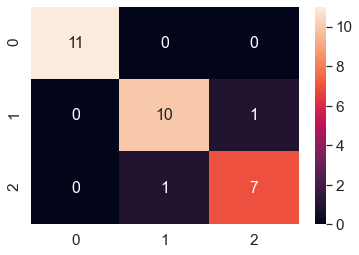

In [22]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
df_cm = pd.DataFrame(output)
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

In [16]:
from sklearn.metrics import classification_report

print(classification_report(predictions_test, test_labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.91      0.91      0.91        11
           2       0.88      0.88      0.88         8

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [30]:
import numpy as np
def plot_data(X,Y):
    # fig config
    h = .02  # step size in the mesh
    x_min, x_max = X.min() - 1, X.max() + 1
    y_min, y_max = Y.min() - 1, Y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))

    Z = mlp.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X, Y, cmap=plt.cm.Paired)
    
    

TypeError: Input z must be 2D, not 1D

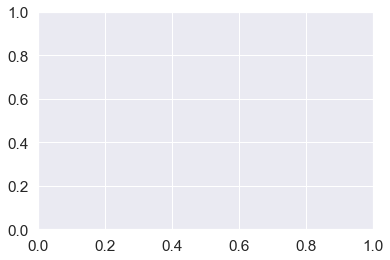

In [31]:
plot_data(test_data[:,0], test_data[:,1],predictions_test)